Network Science FSS 2022

# Home Assignment 4



Submit your solution via Ilias until 23.59pm on Monday, May 30th. Late submissions are accepted for 12 hours following the deadline, with 1/4 of the total possible points deducted from the score.

Submit your solutions in teams of 2 students. Unless explicitly agreed otherwise in advance, **submissions from teams with more or less members will NOT be graded**.
List all members of the team with their student ID and full name in the cell below, and submit only one notebook per team. Only submit a notebook, do not submit the dataset(s) you used or image files that you have created - these have to be created from your notebook. Also, do NOT compress/zip your submission!

Cite ALL your sources for coding this home assignment. In case of plagiarism (copying solutions from other teams or from the internet) ALL team members will be expelled from the course without warning.

#### General guidelines:
* Make sure that your code is executable, any task for which the code does directly not run on our machine will be graded with 0 points.
* Use only packages that are automatically installed along with Anaconda, plus some additional packages that have been introduced in the context of this class.
* Ensure that the notebook does not rely on the current notebook or system state!
  * Use `Kernel --> Restart & Run All` to see if you are using any definitions, variables etc. that 
    are not in scope anymore.
  * Do not rename any of the datasets you use, and load it from the same directory that your ipynb-notebook is located in, i.e., your working directory. In particular, when loading a file, make sure that it has the form `nx.read_edgelist("example.edgelist")` instead of `nx.read_edgelist("C:/User/Path/to/your/Homework/example.edgelist")` so that the code directly works from our machines. 
* Make sure you clean up your code before submission, e.g., properly align your code, and delete every line of code that you do not need anymore, even if you may have experimented with it. Minimize usage of global variables. Do not reuse variable names multiple times!
* Ensure your code/notebook terminates in reasonable time.
* Feel free to use comments in the code. While we do not require them to get full marks, they may help us in case your code has minor errors.
* For questions that require a textual answer, please do not write the answer as a comment in a code cell, but in a Markdown cell below the code. Always remember to provide sufficient justification for all answers.
* You may create as many additional cells as you want, just make sure that the solutions to the individual tasks can be found near the corresponding assignment.
* If you have any general question regarding the understanding of some task, do not hesitate to post in the student forum in Ilias, so we can clear up such questions for all students in the course.

##### List team members, including all student IDs, in the cell below:

In [1]:
# credentials of all team members
team_members = [
    {
        'first_name': 'Emanuela',
        'last_name': 'Kuhlman',
        'student_id': 1580703
    }
]

In [1]:
# general imports may go here!
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from typing import List, Optional, Tuple, Dict
import itertools

### Task 1:  Simulating the SIS-Model on Random Graphs (25 pts)


#### a) Implementing the SIS Model (10 pts)

Implement a function that models one timestep of the spreading according to the SIS model. Use the signature specified in the cell below!

In [39]:
def spread_SIS(G: nx.Graph, beta: float, mu: float, attr: str="state") -> nx.Graph:
    """
    :param G: input networkx graph
    :param beta: probability that an infected individual infects one of his neighbors
    :param mu: probability that an infected individual has recovered at the next timestep
    :param attr: string specifying the name of the node attribute which indicates whether 
    :            or not the corresponding individual is infected
    :             -> should take value 0 if the corresponding individual susceptible, 
    :                and 1 if the individual is infected
    :return: the resulting network after the disease has spread for one round
    """
    # your code here
    for n in G.nodes:
        if G.nodes[n][attr] == 1:
            if random.random() < mu:
                G.nodes[n][attr] = 0
        else:
            for neighbor in G.neighbors(n):
                if G.nodes[neighbor][attr] == 1:
                    if random.random() < beta:
                        G.nodes[n][attr] = 1
                    break
    return G


#### b) Simulating the Spread (15 pts)

Create two random networks, i.e., one Barabasi-Albert network, and one Erdos-Renyi network, both with 100 nodes and average degree $\langle k \rangle = 4$. Initialize both networks by (i) reducing the network to its biggest component, and (ii) setting one randomly chosen node to infected. For that purpose, create a node attribute called ```'state'```, which takes the value `0` if the corresponding individual is susceptible, and `1` otherwise. Save the resulting initial graphs into variables ``ER0`` for the initial Erdos-Renyi graph, and ``BA0`` for the initial Barabasi-Albert network.   
For both networks, apply your implementation from a) with fixed value $\mu = 0.8$, and varied $\beta\in \{0.1,0.2,\dots,0.9,1 \}$ to simulate 50 timesteps of the spreading according to the SIS model. More precisely, for each value of $\beta$, run one simulation per graph model of these 50 timesteps, starting at the initial graphs ``ER0`` and ``BA0``.  
Plot the relative share of infected nodes in the graph over all timesteps, using one plot per graph model which includes all curves for the varied values of $\beta$.  
Provide some explanation and interpretation regarding the effect of varying $\beta$, as well as on the differences between both graph models in cell __A1b)__!

In [100]:
#G = nx.erdos_renyi_graph(100, 0.05)

In [40]:
def initialize(G, attr="state"):
    largest_cc = max(nx.connected_components(G), key=len)            
    H = nx.subgraph(G, largest_cc)
    for n in H.nodes:
        H.nodes[n][attr] = 0
    patient_zero = random.choice(list(H.nodes()))
    H.nodes[patient_zero][attr] = 1
    return H

In [41]:
ER = nx.gnm_random_graph(n = 100, m = 400, seed = 140 ) #Erdos Renyi graph
ER0 = initialize(ER)
BA = nx.barabasi_albert_graph(100, 4)
BA0 = initialize(BA)

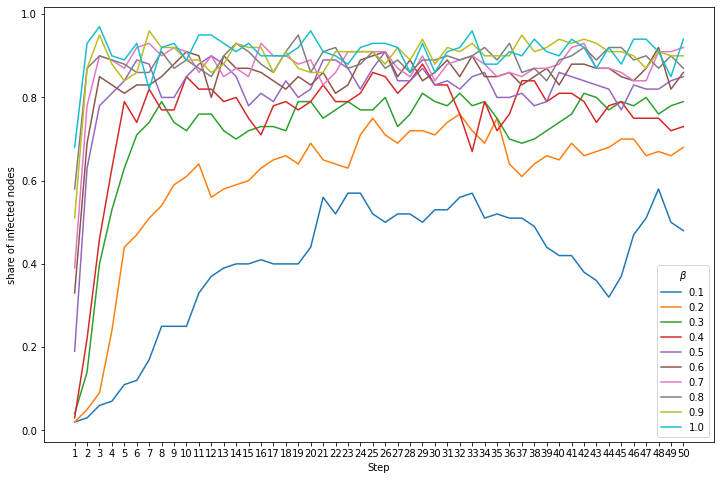

In [42]:
N = nx.number_of_nodes(ER0)
beta_lst = np.arange(0.1, 1.1, 0.1)

plt.figure(figsize=(12, 8))
for b in beta_lst:
    G_b = ER0.copy()
    share_inf = []
    for _ in range(50):
        spread_SIS(G_b, b, mu=0.1)
        share_inf.append(sum(1 for n,state in G_b.nodes(data="state") if state == 1)/N)
    plt.plot(range(1, 51), share_inf, label=round(b,1))

plt.xticks(range(1, 51))
plt.xlabel("Step")
plt.ylabel("share of infected nodes")
plt.legend(title=r"$\beta$")
plt.show()

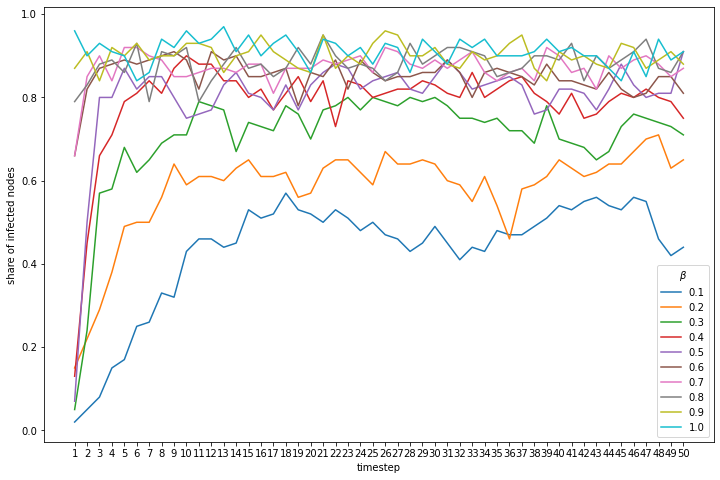

In [43]:
N1 = nx.number_of_nodes(BA0)
beta_lst = np.arange(0.1, 1.1, 0.1)

plt.figure(figsize=(12, 8))
for b in beta_lst:
    G_a = BA0.copy()
    share_inf = []
    for _ in range(50):
        spread_SIS(G_a, b, mu=0.1)
        share_inf.append(sum(1 for n,state in G_a.nodes(data="state") if state == 1)/N1)
    plt.plot(range(1, 51), share_inf, label=round(b,1))

plt.xticks(range(1, 51))
plt.xlabel("timestep")
plt.ylabel("share of infected nodes")
plt.legend(title=r"$\beta$")
plt.show()

**A1b):** _Please provide your answers here!_

### Task 2: The Friendship Paradox (25 pts)

In this task, we will take a closer look at the friendship paradox, utilizing two different empirical networks to base our analysis on.

__References:__  
[1] Vineet Kumar, David Krackhardt, Scott Feld. Network Interventions Based on Inversity: Leveraging the Friendship Paradox in Unknown Network Structures. [ https://vineetkumars.github.io/Papers/NetworkInversity.pdf ]   
[2] Jérôme Kunegis. KONECT - The Koblenz Network Collection. In Proc. Int. Web Observatory Workshop, pages 1343-1350, 2013   
[3] Internet topology network dataset -- KONECT, April 2017.[ http://konect.cc/networks/topology/ ]  
[4] Pretty Good Privacy network dataset -- KONECT, April 2017. [ http://konect.cc/networks/arenas-pgp/ ]

In [2]:
# load internet topology network
I = nx.read_edgelist("internet.edgelist", data=[('weight', int), ('time',int)], comments='%', nodetype=int)
print(nx.info(I))

Graph with 34761 nodes and 107720 edges


In [3]:
# load pretty good privacy (PGP) network
P = nx.read_edgelist("pgp.edgelist", comments='%', nodetype=int)
print(nx.info(P))

Graph with 10680 nodes and 24316 edges


#### a) Local and Global Mean of Friends of Friends (8 pts) 
Often we want to identify highly connected nodes without having access to the network structure, i.e. not being able to easily locate hubs. In these cases we can exploit the friendship paradox, which states that on average, individuals have fewer friends than their friends do. In the lecture you learned about two strategies to compute the mean amount of friends of friends in a network.    
Write two functions that take a `networkx` graph ```G``` as input, with one of them returning the local mean amount of friends of friends, and the other one returning the global mean friends of friends (cf. reference [1]). Use the signatures specified in the cells below!

In [4]:
def local_mean_degree(G: nx.Graph) -> float:
    """
    :param G: networkx graph
    :
    :return: local mean friends of friends value
    """
    # your code here
    N = nx.number_of_nodes(G)
    sum_fof = 0
    avg_fof = 0
    for n in G.nodes():
        for i in G.neighbors(n):
            sum_fof += G.degree(i)
        avg_fof = sum_fof / G.degree(n)     

    local_mean = avg_fof / N
    return local_mean

In [5]:
def global_mean_degree(G: nx.Graph) -> float:
    """
    :param G: networkx graph
    :
    :return: global mean friends of friends value
    """
    # your code here
    N = nx.number_of_nodes(G)
    sum_fof = 0
    sum_degree = 0
    for n in G.nodes():
        sum_degree += G.degree(n)
        for i in G.neighbors(n):
            sum_fof += G.degree(i)

    global_mean = sum_fof / sum_degree
    return global_mean   

#### b) Comparing Local and Global Mean (2 pts)
Apply your implementations on the PGP and internet topology graphs. Compare the resulting values with each other as well as with the average degree of each graph. What do you observe?

In [6]:
print('Local mean degree of Internet topology: ', local_mean_degree(I)) 
print('Local mean degree of PGP: ', local_mean_degree(P))


Local mean degree of Internet topology:  1979.921233566353
Local mean degree of PGP:  85.97621722846442


In [7]:
print('Global mean degree of Internet topology: ', global_mean_degree(I)) 
print('Global mean degree of PGP: ', global_mean_degree(P))

Global mean degree of Internet topology:  319.45804864463423
Global mean degree of PGP:  18.881107089981906


**A2b):** _Please provide your answers here!_

#### c) Local and Global Node Sampling (4 pts)
The distinction between local and global mean suggests different strategies to target central nodes. 
Write two functions that implement the local and global node sampling strategies discussed in the lecture, with ```sample_local``` returning a random neighbor of a random initial node according to the local strategy, and ```sample_global``` returning a list of nodes that was sampled from the neighborhood of a random initial node, each with probability $p$.   
Make sure that you don't select isolated nodes as initial nodes. Note, that the number of nodes chosen under global sampling is variable, however, the global strategy must not return an empty list. Thus, if no neighbouring node has been sampled, a new random initial node should be selected. This procedure is repeated until at least one node has been sampled.
Use the signatures specified in the cell below!

In [24]:
def sample_local(G: nx.Graph) -> int:
    """
    :param G: networkx graph
    :
    :return: node sampled according to local strategy
    """
    # your code here
    node_zero = random.choice(list(G.nodes))
    while G.degree(node_zero) == 0:
        node_zero = random.choice(list(G.nodes))
    neighbor = list(G.neighbors(node_zero))
    #sample_node = random.sample(list(G.neighbors(node_zero)),1)   
    sample_node = random.choice(neighbor)
    return sample_node



In [9]:
def sample_global(G: nx.Graph, p: float=0.5) -> List:
    """
    :param G: networkx graph
    :param p: probability that neighbor of initial node is sampled
    :
    :return: list of nodes sampled according to global strategy
    """
    # your code here
    node_s = random.choice(list(G.nodes))
    sample_nodes = []
    for n in G.neighbors(node_s):
        if random.random() < p:          
            sample_nodes.append(n)
    return sample_nodes

#### d) Comparing Local and Global Sampling (3 pts) 
Apply your implementations from c) on the PGP and internet topology graphs to sample 1000 nodes with each strategy. Compute the average degree of each sampled list of nodes. What do you observe?

In [18]:
P_local_sample = []
I_local_sample = []
for i in range (1000):
    P_local_sample.append(sample_local(P))
    I_local_sample.append(sample_local(I))
PGP_local = P.subgraph(P_local_sample)
Internet_local = I.subgraph(I_local_sample)  

In [47]:
I_global_sample = []
P_global_sample = []
for i in range (1000):
    p = sample_global(P)
    m = sample_global(I)
    for j in m:
        I_global_sample.append(j)
    for l in p:
        P_global_sample.append(l)
PGP_global = P.subgraph(P_global_sample)   
I_Global = I.subgraph(I_global_sample)

In [48]:
degreesL = [val for (node, val) in PGP_local.degree()]
degreesG = [val for (node, val) in PGP_global.degree()]

print("local PGP avg. degree: ",sum(degreesL)/1000, "global PGP avg. degree: ", sum(degreesG)/1000 )

local PGP avg. degree:  1.67 global PGP avg. degree:  12.666


In [151]:
IL_degrees = [val for (node, val) in Internet_local.degree()]
IG_degrees = [val for (node, val) in I_Global.degree()]
print("local Internet avg. degree: ", sum(IL_degrees)/1000, "Global Internet avg. degree: ", sum(IG_degrees)/1000)


local Internet avg. degree:  9.818 Global Internet avg. degree:  29.402


**A2d):** _Please provide your answers here!_

#### e) Attacking the Networks (8 pts)
Finally, we want to use our sampling strategies to attack the given graphs.
Thus, we repeatedly sample node(s) according to each strategy and delete the sampled nodes, until 1000 nodes have been removed.
As a baseline, we further perform a random node attack, where we simply remove a randomly sampled node from the graph.
For both graphs, plot the number of removed nodes according to each strategy against the share of the giant component. What do you observe?

In [10]:
def remove_random(G: nx.Graph, n):
    H = G.copy()
    node = list(G.nodes) 
    remove = random.sample(node, n)
    H.remove_nodes_from(remove)
    return H  

In [11]:
def local_sample_attack(G: nx.Graph):
    H= G.copy()
    node = sample_local(H)
    H.remove_node(node)
    return H  

In [15]:
def global_sample_attack(G:nx.Graph):
    remove = sample_global(G)
    n = len(remove)
    G.remove_nodes_from(remove)
    return G


In [16]:
def share_of_giant_component(G):
    n = nx.number_of_nodes(G)
    giant_size = max(len(c) for c in nx.connected_components(G))
    return giant_size/n

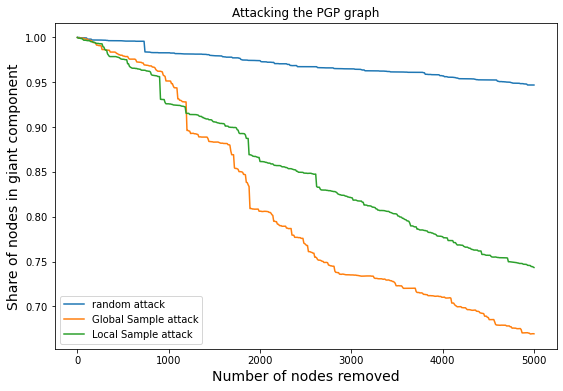

In [27]:
P_rand = P.copy()
P_global = P.copy()
P_local = P.copy()
share_P_rand = [share_of_giant_component(P_rand)]
share_P_global = [share_of_giant_component(P_global)]
share_P_local = [share_of_giant_component(P_local)]


for i in range(500):
    P_rand = remove_random(P_rand, 1)
    P_global = global_sample_attack(P_global)
    P_local = local_sample_attack(P_local)

    share_P_rand.append(share_of_giant_component(P_rand))
    share_P_global.append(share_of_giant_component(P_global))
    share_P_local.append(share_of_giant_component(P_local))
    
removed_nodes = range(0, 50*10+1, 10)
    
plt.figure(figsize=(9, 6))
plt.plot(removed_nodes, share_P_rand, label="Random attack")
plt.plot(removed_nodes, share_P_global, label="Global Sample attack")
plt.plot(removed_nodes, share_P_local, label="Local Sample attack")

plt.title("Attacking the PGP graph")
plt.xlabel("Number of nodes removed", fontsize=14)
plt.ylabel("Share of nodes in giant component", fontsize=14)
plt.legend()
plt.show() 

In [ ]:
P_rand = P.copy()
P_global = P.copy()
P_local = P.copy()
share_P_rand = [share_of_giant_component(P_rand)]
share_P_global = [share_of_giant_component(P_global)]
share_P_local = [share_of_giant_component(P_local)]


for i in range(1000):
    P_rand = remove_random(P_rand, 1)
    P_global = global_sample_attack(P_global)
    P_local = local_sample_attack(P_local)

    share_P_rand.append(share_of_giant_component(P_rand))
    share_P_global.append(share_of_giant_component(P_global))
    share_P_local.append(share_of_giant_component(P_local))
    
    
    
removed_nodes = range(0, 1000*1+1, 10)
    
plt.figure(figsize=(9, 6))
plt.plot(removed_nodes, share_P_rand, label="Random attack")
plt.plot(removed_nodes, share_P_global, label="Global Sample attack")
plt.plot(removed_nodes, share_P_local, label="Local Sample attack")

plt.title("Attacking the PGP graph")
plt.xlabel("Number of nodes removed", fontsize=14)
plt.ylabel("Share of nodes in giant component", fontsize=14)
plt.legend()
plt.show() 

In [ ]:
I_rand = I.copy()
I_global = I.copy()
I_local = I.copy()
share_I_rand = [share_of_giant_component(I_rand)]
share_I_global = [share_of_giant_component(I_global)]
share_I_local = [share_of_giant_component(I_local)]


for i in range(1000):
    I_rand = remove_random(I_rand, 1)
    I_global = global_sample_attack(I_global)
    I_local = local_sample_attack(I_local)

    share_I_rand.append(share_of_giant_component(I_rand))
    share_I_global.append(share_of_giant_component(I_global))
    share_I_local.append(share_of_giant_component(I_local))
    
removed_nodes = range(0, 100*10+1, 10)
    
plt.figure(figsize=(9, 6))
plt.plot(removed_nodes, share_I_rand, label="Random attack")
plt.plot(removed_nodes, share_I_global, label="Global Sample attack")
plt.plot(removed_nodes, share_I_local, label="Local Sample attack")

plt.title("Attacking the Internet graph")
plt.xlabel("Number of nodes removed", fontsize=14)
plt.ylabel("Share of nodes in giant component", fontsize=14)
plt.legend()
plt.show() 

**A2e):** _Please provide your answers here!_